In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [19]:
# 1. Read the image "img.jpg" and display it using OpenCV
image = cv2.imread("img.jpg" , cv2.IMREAD_GRAYSCALE)[:1300, :]

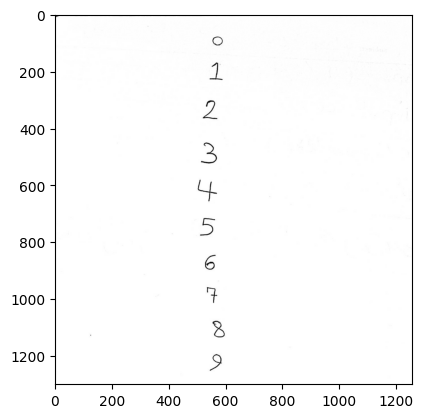

In [20]:
# 2. Display the image using matplotlib
plt.imshow(image, cmap='gray')

In [59]:
#Or Using OpenCV
binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)[1]


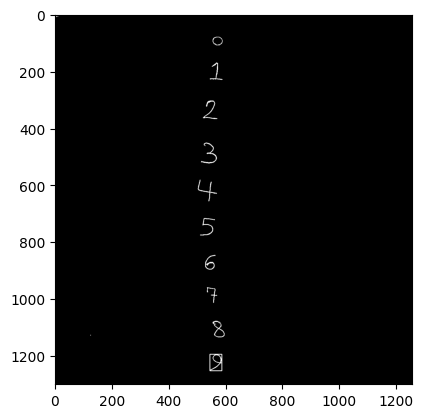

In [60]:
plt.imshow(binary_image, cmap='gray')

In [206]:
contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]


In [316]:
number_arrays = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 10 and h > 10:
        num = binary_image[y:y+h, x:x+w]
        height , width = num.shape
        if height < 28 and width < 28:
            num = np.pad(num, (((28- width) // 2),((28- height) // 2)), 'constant', constant_values=0)
        elif height < 28:
            num = np.pad(num, (width - 28,(28 - height) // 2), 'constant', constant_values=0)
        elif width < 28:
            num = np.pad(num, (((28-width)//2),(height - 28)), 'constant', constant_values=0)
        # print(num)
        resize_num = cv2.resize(num, (28, 28), interpolation = cv2.INTER_AREA)
        number_array = resize_num.flatten()
        number_arrays.append(number_array)
print(len(number_arrays))

10


10


In [317]:
final = np.array(number_arrays, dtype=np.uint8)
print(final.shape)
print(final)

(10, 784)
[[182 255 255 ... 255 255 182]
 [  0   0   9 ...   3   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 175]
 [  0   0   0 ... 196 155 140]
 [  0   0   0 ...   0   0   0]]


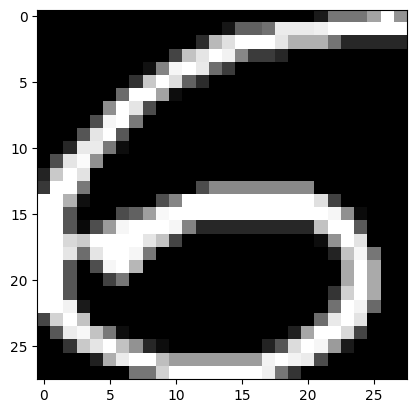

In [318]:
plt.imshow(final[3].reshape(28,28), cmap='gray')

In [319]:
np.savetxt("numbers.csv", final, delimiter=",")